# Cleaning and Preparing the Dataset

Our dataset includes data from the very beginning of the National Basketball Association (NBA) in 1947 until the current season in 2026. The game of basketball has changed and evolved over time to the point where it almost doesn't look like the same game. To ensure prevalence and accuracy, we will be trimming the dataset down to the stretch of 1980-2025.

#### Issues:
The data set we were collecting our awards voting from did not include the voting information from the 2024-2025 NBA season, so that had to be gathered externally in order to modify the csv file.

In [ ]:
# some useful mysklearn package import statements and reloads
import importlib
import numpy as np
import tabulate as tb
import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

# uncomment once you paste your mypytable.py into mysklearn package
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyNaiveBayesClassifier, MyKNeighborsClassifier


In [ ]:
adv = MyPyTable().load_from_file("data/Advanced.csv")
vote = MyPyTable().load_from_file("data/End of Season Teams (Voting).csv")
opp_spg = MyPyTable().load_from_file("data/Opponent Stats Per Game.csv")
p_spg = MyPyTable().load_from_file("data/Player Per Game.csv")
t_spg = MyPyTable().load_from_file("data/Team Stats Per Game.csv")
team_adv = MyPyTable().load_from_file("data/Team Summaries.csv")

In [ ]:
###########################################################
# Player Advanced Stats

adv_idx_post2025 = 0
adv_idx_pre1980 = 0

for idx,season in enumerate(adv.get_column("season")):
    if adv_idx_post2025 == 0 and season == 2025:
        adv_idx_post2025 = idx
    if adv_idx_pre1980 == 0 and season <1980:
        adv_idx_pre1980 = idx
        break

adv_idxs = list(range(0,adv_idx_post2025))+(list(range(adv_idx_pre1980,len(adv.data))))
adv.drop_rows(adv_idxs)
adv.save_to_file("data/Updated_Advanced.csv")

###########################################################
###########################################################
# Team Advanced Stats

team_adv_idx_post2025 = 0
team_adv_idx_pre1980 = 0

for idx,season in enumerate(team_adv.get_column("season")):
    if team_adv_idx_post2025 == 0 and season == 2025:
        team_adv_idx_post2025 = idx
    if team_adv_idx_pre1980 == 0 and season <1980:
        team_adv_idx_pre1980 = idx
        break

team_adv_idxs = list(range(0,team_adv_idx_post2025))+(list(range(team_adv_idx_pre1980,len(team_adv.data))))
team_adv.drop_rows(team_adv_idxs)
team_adv.save_to_file("data/Updated_Team_Advanced.csv")

###########################################################
###########################################################
# All-NBA / All-Defensive Team Voting Results

removal_idx = []
# all-nba
# for idx,type in enumerate(vote.get_column("type")):
#     if type == "all_defense" or type=="all_rookie":
#         removal_idx.append(idx)

# all-defensive
# for idx,type in enumerate(vote.get_column("type")):
#     if type == "all_nba" or type=="all_rookie":
#         removal_idx.append(idx)

vote.drop_rows(removal_idx)
vote_idx_post2025 = 0
vote_idx_pre1980 = 0

for idx,season in enumerate(vote.get_column("season")):
    if vote_idx_pre1980 == 0 and season <1980:
        vote_idx_pre1980 = idx
        break

vote_idxs = list(range(0,vote_idx_post2025))+(list(range(vote_idx_pre1980,len(vote.data))))
vote.drop_rows(vote_idxs)
vote.save_to_file("data/Updated_End of Season Teams (All_NBA).csv")
# vote.save_to_file("data/Updated_End of Season Teams (All_Defense).csv")

###########################################################
###########################################################
# Team Opponent Stats per Game

opp_spg_idx_post2025 = 0
opp_spg_idx_pre1980 = 0

for idx,season in enumerate(opp_spg.get_column("season")):
    if opp_spg_idx_post2025 == 0 and season == 2025:
        opp_spg_idx_post2025 = idx
    if opp_spg_idx_pre1980 == 0 and season <1980:
        opp_spg_idx_pre1980 = idx
        break

opp_spg_idxs = list(range(0,opp_spg_idx_post2025))+(list(range(opp_spg_idx_pre1980,len(opp_spg.data))))
opp_spg.drop_rows(opp_spg_idxs)
opp_spg.save_to_file("data/Updated_Opponent Stats Per Game.csv")

###########################################################
###########################################################
# Player Stats per Game

p_idx_post2025 = 0
p_idx_pre1980 = 0

for idx,season in enumerate(p_spg.get_column("season")):
    if p_idx_post2025 == 0 and season == 2025:
        adv_idx_post2025 = idx
    if p_idx_pre1980 == 0 and season <1980:
        p_idx_pre1980 = idx
        break

p_idxs = list(range(0,p_idx_post2025))+(list(range(p_idx_pre1980,len(p_spg.data))))
p_spg.drop_rows(adv_idxs)
p_spg.save_to_file("data/Updated_Player Per Game.csv")

###########################################################
###########################################################
# Team Stats per Game

t_spg_idx_post2025 = 0
t_spg_idx_pre1980 = 0

for idx,season in enumerate(t_spg.get_column("season")):
    if t_spg_idx_post2025 == 0 and season == 2025:
        t_spg_idx_post2025 = idx
    if t_spg_idx_pre1980 == 0 and season <1980:
        t_spg_idx_pre1980 = idx
        break

t_spg_idxs = list(range(0,t_spg_idx_post2025))+(list(range(t_spg_idx_pre1980,len(t_spg.data))))
t_spg.drop_rows(t_spg_idxs)
t_spg.save_to_file("data/Updated_Team Stats Per Game.csv")

###########################################################

In [ ]:
players = p_spg.perform_inner_join(adv,["season","lg","player","player_id","age","team","pos","g","gs"])
season_idx = players.column_names.index("season")
player_idx = players.column_names.index("player")
team_idx = players.column_names.index("team")
mp_idx = players.column_names.index("mp")  # total minutes

primary_team = {}
for row in players.data:
    if row[team_idx] not in ["2TM", "3TM", "4TM","5TM"]:
        key = (row[season_idx], row[player_idx])
        if key not in primary_team or row[mp_idx] > primary_team[key][1]:
            primary_team[key] = (row[team_idx], row[mp_idx])

new_data = []
for row in players.data:
    key = (row[season_idx], row[player_idx])
    if row[team_idx] in ["2TM", "3TM", "4TM","5TM"]:
        if key in primary_team:
            new_row = row.copy()
            new_row[team_idx] = primary_team[key][0]
            new_data.append(new_row)
    else:
        new_data.append(row)

players =  MyPyTable(players.column_names, new_data)

In [ ]:
voted = []
voted_players = set(
    (int(row[vote.column_names.index("season")]), 
     row[vote.column_names.index("player_id")])
    for row in vote.data
)
season_idx = players.column_names.index("season")
player_idx = players.column_names.index("player_id")

for row in players.data:
    key = (row[season_idx], row[player_idx])
    voted.append(1 if key in voted_players else 0)

players.column_names.append("voted")
for i,row in enumerate(players.data):
    row.append(voted[i])

In [ ]:

# Defensive team columns
player_columns =['season','team','g','gs','pos','mp_per_game','drb_per_game','trb_per_game','stl_per_game','blk_per_game','pf_per_game','drb_percent','trb_percent','stl_percent','blk_percent','dws','ws','ws_48','dbpm','bpm','vorp','voted']
team_columns = ['season','team','abbreviation','w','l','pw','pl','mov','srs','d_rtg','pace','opp_e_fg_percent', 'opp_tov_percent', 'drb_percent', 'opp_ft_fga']

new_column_names = player_columns[:]
cols = [players.get_column(col) for col in player_columns]
new_data = list(map(list, zip(*cols)))
players_small = MyPyTable(new_column_names,new_data)

new_column_names = team_columns[:]
cols = [team_adv.get_column(col) for col in team_columns]
new_data = list(map(list, zip(*cols)))

team_adv_small = MyPyTable(new_column_names,new_data)

players_small_copy = MyPyTable( column_names = ["abbreviation" if c=="team" else c for c in players_small.column_names], data = players_small.data)

defensive_team_data = players_small_copy.perform_inner_join(team_adv_small, ["season", "abbreviation"])

defensive_team_data.save_to_file("data/Defensive_Team_Data.csv")

In [ ]:
def clean_instance(row):
    cleaned = []
    for val in row:
        if val == "NA":
            cleaned.append(0)   # treat missing GS (or other stats) as its own category
        else:
            cleaned.append(str(val))    # convert all other values to strings
    return cleaned


cols = ['season','blk_per_game','stl_per_game','d_rtg','dbpm']
knn = MyKNeighborsClassifier(5)
import mysklearn.newNaiveBayes
importlib.reload(mysklearn.newNaiveBayes)
from mysklearn.newNaiveBayes import NaiveBayesClassifier,OneHotEncoder
nbc = NaiveBayesClassifier()
from sklearn.model_selection import train_test_split
mp = MyPyTable()
mp.load_from_file("data/Defensive_Team_Data.csv")

# y = target column
y = mp.get_column("voted")

# One-hot encode seasons
seasons_encoded = OneHotEncoder().fit_transform(mp.get_column("season")).astype(float)
x_data = [
    mp.get_column('d_rtg'),
    mp.get_column('ws'),
    mp.get_column('blk_percent')]

x_data = [clean_instance(row) for row in x_data]
# Numeric columns as 2D array
numeric_cols = np.column_stack(x_data).astype(float)

# Combine categorical (one-hot) and numeric features
X = np.hstack([seasons_encoded, numeric_cols])

# Split train/test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Indices for MixedNaiveBayes
cat_idx = list(range(seasons_encoded.shape[1]))      # categorical one-hot columns
num_idx = list(range(seasons_encoded.shape[1], X.shape[1]))  # numeric columns

# Fit classifier
nbc.fit(x_train, y_train, numeric_idx=num_idx, categorical_idx=cat_idx)
# knn.fit(x_train, y_train)
y_pred_nbc = nbc.predict(x_test)
# y_pred_nbc = knn.predict(x_test)
print("Naive Bayes Classifier Evaluation:")
print("Accuracy:",myevaluation.accuracy_score(y_test, y_pred_nbc))
print("F1 Score:",myevaluation.binary_f1_score(y_test, y_pred_nbc,labels=[0,1],pos_label=1))
print("Precision:",myevaluation.binary_precision_score(y_test, y_pred_nbc,labels=[0,1],pos_label=1))
print("Recall:",myevaluation.binary_recall_score(y_test, y_pred_nbc,labels=[0,1],pos_label=1))
                                              

Naive Bayes Classifier Evaluation:
Accuracy: 0.9561332250203087
F1 Score: 0.6974789915966386
Precision: 0.6897506925207756
Recall: 0.7053824362606232


x_data = [mp.get_column('blk_per_game'),  
    mp.get_column('stl_per_game'),  
    mp.get_column('d_rtg'),  
    mp.get_column('dbpm'),  
    mp.get_column('pace'),  
    mp.get_column('vorp'),  
    mp.get_column('drb_percent')]
Naive Bayes Classifier Evaluation:
Accuracy: 0.9398862713241267  
F1 Score: 0.6442307692307692  
Precision: 0.5469387755102041  
Recall: 0.783625730994152  


x_data = [mp.get_column('blk_per_game'),  
    mp.get_column('stl_per_game'),  
    mp.get_column('d_rtg'),  
    mp.get_column('dbpm'),  
    mp.get_column('vorp'),  
    mp.get_column('drb_percent')]
Naive Bayes Classifier Evaluation:
Accuracy: 0.938667749796913  
F1 Score: 0.6404761904761905  
Precision: 0.5401606425702812  
Recall: 0.7865497076023392  


In [ ]:
y = mp.get_column("voted")
X = np.hstack([seasons_encoded, numeric_cols])
folds = myevaluation.stratified_kfold_split(X,y,10,0,True)

for train_idx, test_idx in folds:
    X_train, X_test = [X[i] for i in train_idx], [X[i] for i in test_idx]
    y_train, y_test = [y[i] for i in train_idx], [y[i] for i in test_idx]

cat_idx = list(range(seasons_encoded.shape[1]))      # categorical one-hot columns
num_idx = list(range(seasons_encoded.shape[1], X.shape[1]))  # numeric columns

# Fit classifier
nbc.fit(X_train, y_train, numeric_idx=num_idx, categorical_idx=cat_idx)

y_pred_nbc = nbc.predict(X_test)
print("Naive Bayes Classifier Evaluation:")
print("Accuracy:",myevaluation.accuracy_score(y_test, y_pred_nbc))
print("F1 Score:",myevaluation.binary_f1_score(y_test, y_pred_nbc,labels=[0,1],pos_label=1))
print("Precision:",myevaluation.binary_precision_score(y_test, y_pred_nbc,labels=[0,1],pos_label=1))
print("Recall:",myevaluation.binary_recall_score(y_test, y_pred_nbc,labels=[0,1],pos_label=1))

Naive Bayes Classifier Evaluation:
Accuracy: 0.9528646891507517
F1 Score: 0.6666666666666667
Precision: 0.6304347826086957
Recall: 0.7073170731707317


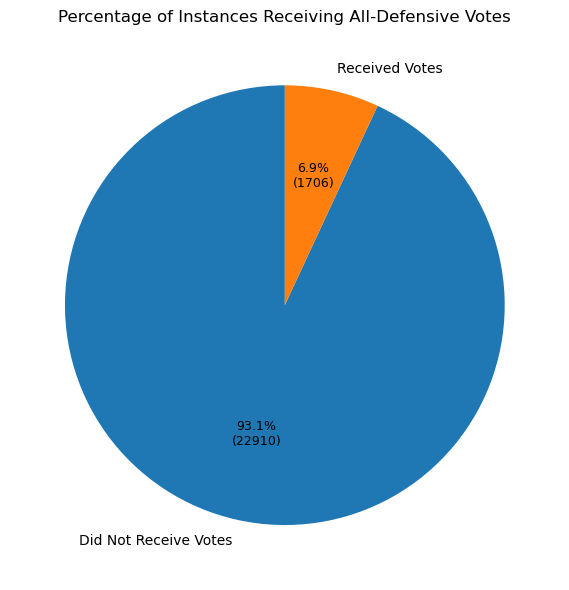

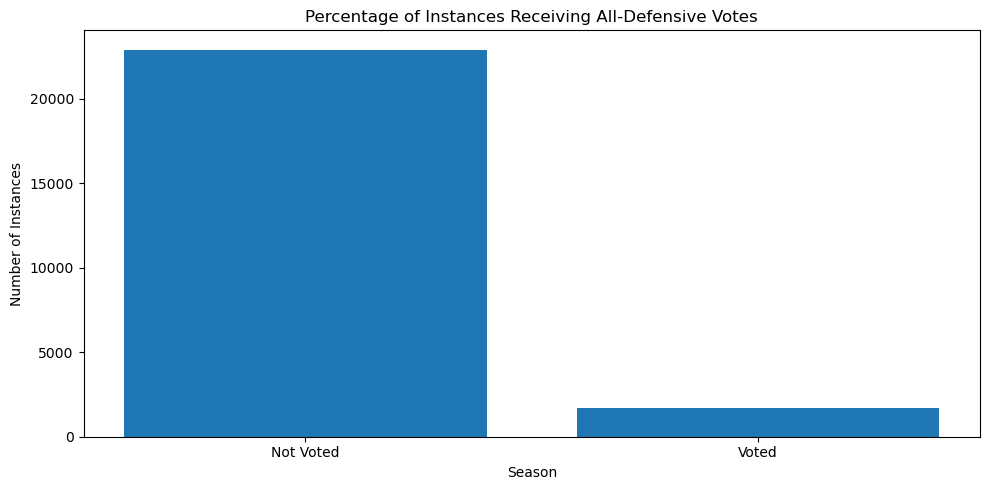

In [ ]:

myutils.pie_chart(['Did Not Receive Votes','Received Votes'], [len(y)-sum(y), sum(y)], "plots/defensive_team_pie_chart.png","Percentage of Instances Receiving All-Defensive Votes")
myutils.bar_chart(x=['Not Voted','Voted'], y=[len(y)-sum(y), sum(y)], filename="plots/defensive_team_bar_chart.png", title="Percentage of Instances Receiving All-Defensive Votes" ,y_label="Number of Instances", x_label="Season")

seasons = mp.get_column('season')
unique_seasons = sorted(list(set(seasons)))
counts = [seasons.count(s) for s in unique_seasons]



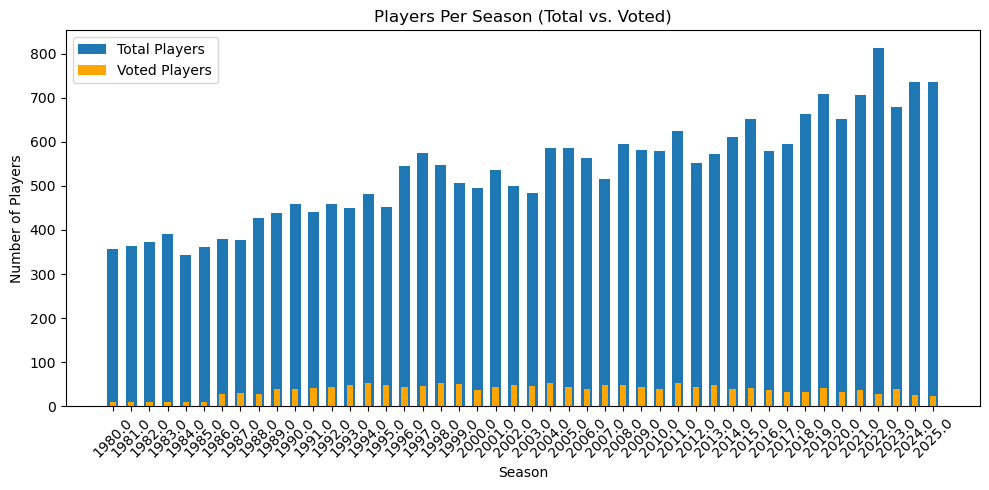

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

seasons = mp.get_column('season')
votes = mp.get_column('voted')

unique_seasons = sorted(list(set(seasons)))

# counts
total_counts = [seasons.count(s) for s in unique_seasons]
voted_counts = [
    sum(1 for i in range(len(seasons)) if seasons[i] == s and votes[i] == 1)
    for s in unique_seasons
]

x = np.arange(len(unique_seasons))
bar_width = 0.6   # wide blue bar
front_width = 0.35  # smaller orange bar in front

plt.figure(figsize=(10,5))

# background blue bar (total players)
plt.bar(x, total_counts, width=bar_width, label="Total Players")

# foreground orange bar (voted players)
plt.bar(x, voted_counts, width=front_width, label="Voted Players", color="orange")

plt.xlabel("Season")
plt.ylabel("Number of Players")
plt.title("Players Per Season (Total vs. Voted)")
plt.xticks(x, unique_seasons, rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("plots/players_per_season_total_vs_voted.png")
plt.show()


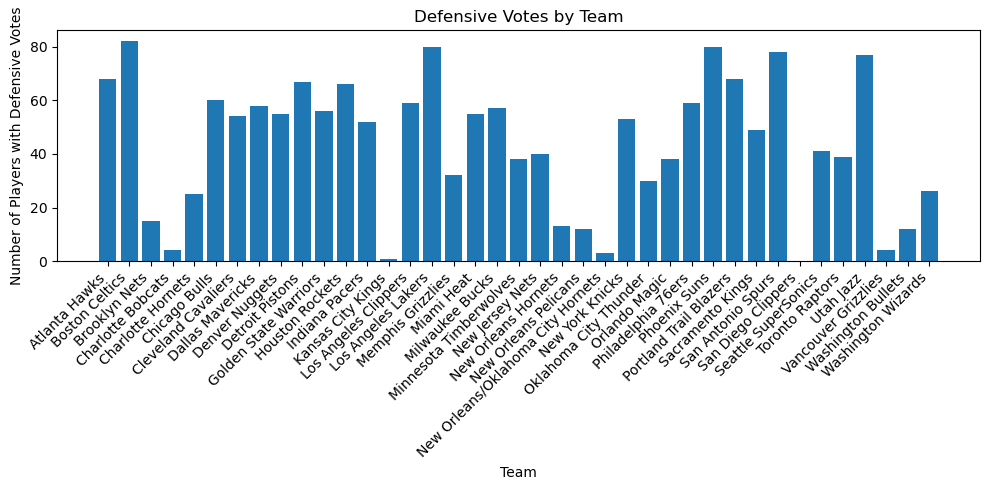

In [ ]:
import matplotlib.pyplot as plt

teams = mp.get_column("team")          # or "abbreviation" depending on your table
votes = mp.get_column("voted")

# Unique teams
unique_teams = sorted(list(set(teams)))

# Count how many players received votes per team
vote_counts = [
    sum(1 for i in range(len(teams)) if teams[i] == t and votes[i] == 1)
    for t in unique_teams
]

myutils.bar_chart(x=unique_teams,y=vote_counts, filename ="plots/defensive_votes_by_team.png", title="Defensive Votes by Team", y_label="Number of Players with Defensive Votes", x_label="Team",x_ticks=[45,"right"])

In [ ]:
p = MyPyTable().load_from_file("data/Defensive_Team_Data.csv")
import random
v = p.get_column("voted")

f=[]
while len(f)<v.count(1):
    x = random.randint(0,len(v)-1)
    if v[x]!=1:
        f.append(x)


y = [idx for idx,x in enumerate(v) if x==1]
f.extend(y)
data = [p.data[i] for i in f]
d= MyPyTable(p.column_names, data)
d.save_to_file("data/Balanced_Defensive_Team_Data_Sampled.csv")

1706


In [ ]:
cols = ['season','blk_per_game','stl_per_game','d_rtg','dbpm']
knn = MyKNeighborsClassifier(5)
import mysklearn.newNaiveBayes
importlib.reload(mysklearn.newNaiveBayes)
from mysklearn.newNaiveBayes import NaiveBayesClassifier,OneHotEncoder
nbc = NaiveBayesClassifier()
from sklearn.model_selection import train_test_split

mp = d
# y = target column
y = mp.get_column("voted")

# One-hot encode seasons
seasons_encoded = OneHotEncoder().fit_transform(mp.get_column("season")).astype(float)
x_data = [
    mp.get_column('vorp')]

x_data = [clean_instance(row) for row in x_data]
# Numeric columns as 2D array
numeric_cols = np.column_stack(x_data).astype(float)

# Combine categorical (one-hot) and numeric features
X = np.hstack([seasons_encoded, numeric_cols])

# Split train/test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Indices for MixedNaiveBayes
cat_idx = list(range(seasons_encoded.shape[1]))      # categorical one-hot columns
num_idx = list(range(seasons_encoded.shape[1], X.shape[1]))  # numeric columns

# Fit classifier
nbc.fit(x_train, y_train, numeric_idx=num_idx, categorical_idx=cat_idx)
# knn.fit(x_train, y_train)
y_pred_nbc = nbc.predict(x_test)
# y_pred_nbc = knn.predict(x_test)
print("Naive Bayes Classifier Evaluation:")
print("Accuracy:",myevaluation.accuracy_score(y_test, y_pred_nbc))
print("F1 Score:",myevaluation.binary_f1_score(y_test, y_pred_nbc,labels=[0,1],pos_label=1))
print("Precision:",myevaluation.binary_precision_score(y_test, y_pred_nbc,labels=[0,1],pos_label=1))
print("Recall:",myevaluation.binary_recall_score(y_test, y_pred_nbc,labels=[0,1],pos_label=1))

Naive Bayes Classifier Evaluation:
Accuracy: 0.8945827232796486
F1 Score: 0.8909090909090909
Precision: 0.8909090909090909
Recall: 0.8909090909090909


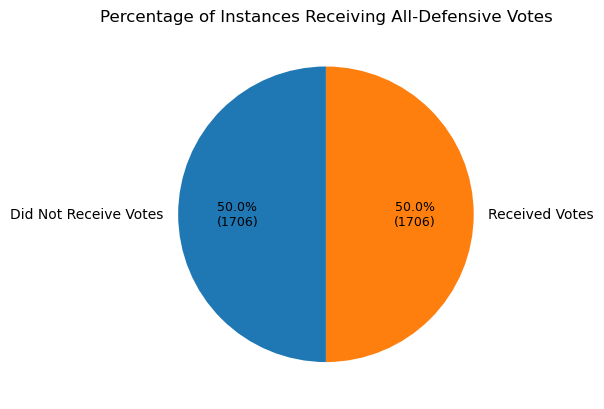

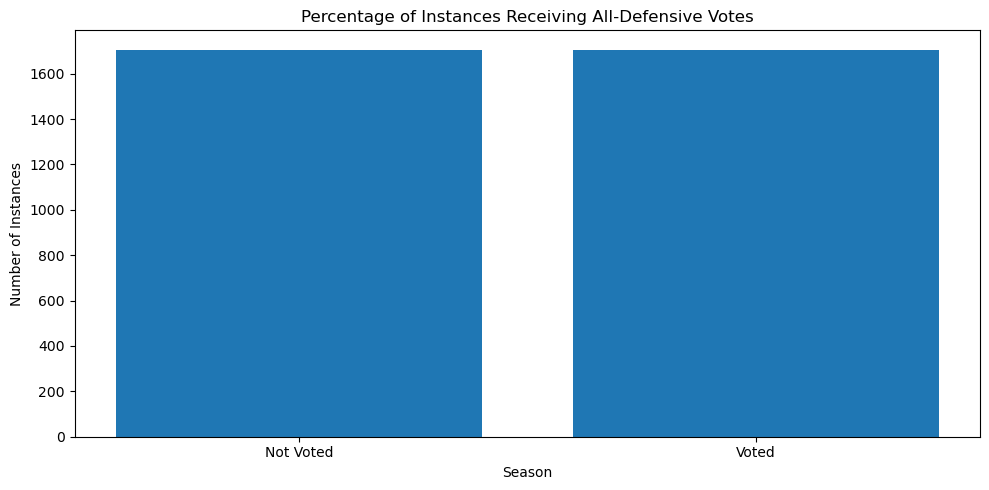

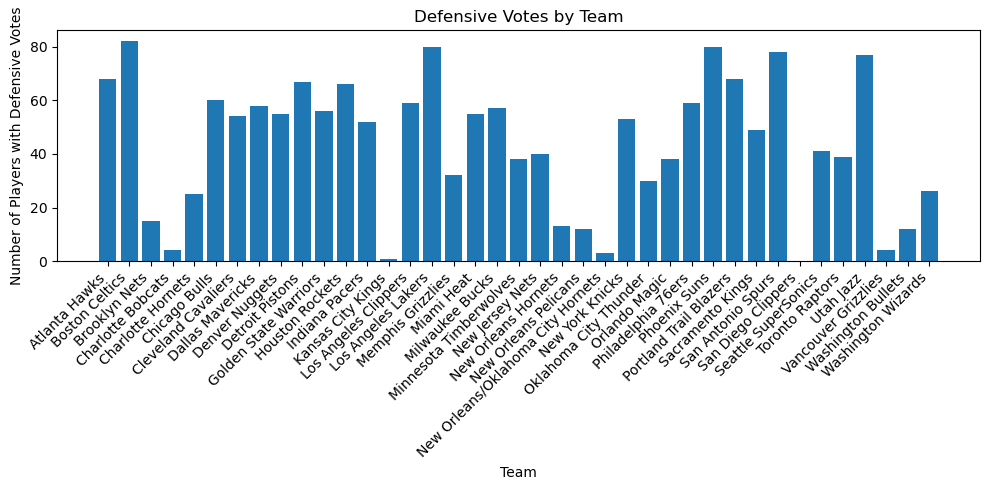

In [ ]:
myutils.pie_chart(labels=['Did Not Receive Votes','Received Votes'], y=[len(y)-sum(y), sum(y)], filename="plots/balanced/defensive_team_pie_chart.png",title="Percentage of Instances Receiving All-Defensive Votes")
myutils.bar_chart(x=['Not Voted','Voted'], y=[len(y)-sum(y), sum(y)], filename="plots/balanced/defensive_team_bar_chart.png", title="Percentage of Instances Receiving All-Defensive Votes" ,y_label="Number of Instances", x_label="Season")
teams = mp.get_column("team")          # or "abbreviation" depending on your table
votes = mp.get_column("voted")

# Unique teams
unique_teams = sorted(list(set(teams)))

# Count how many players received votes per team
vote_counts = [
    sum(1 for i in range(len(teams)) if teams[i] == t and votes[i] == 1)
    for t in unique_teams
]
myutils.bar_chart(x=unique_teams,y=vote_counts, filename ="plots/balanced/defensive_votes_by_team.png", title="Defensive Votes by Team", y_label="Number of Players with Defensive Votes", x_label="Team",x_ticks=[45,"right"])


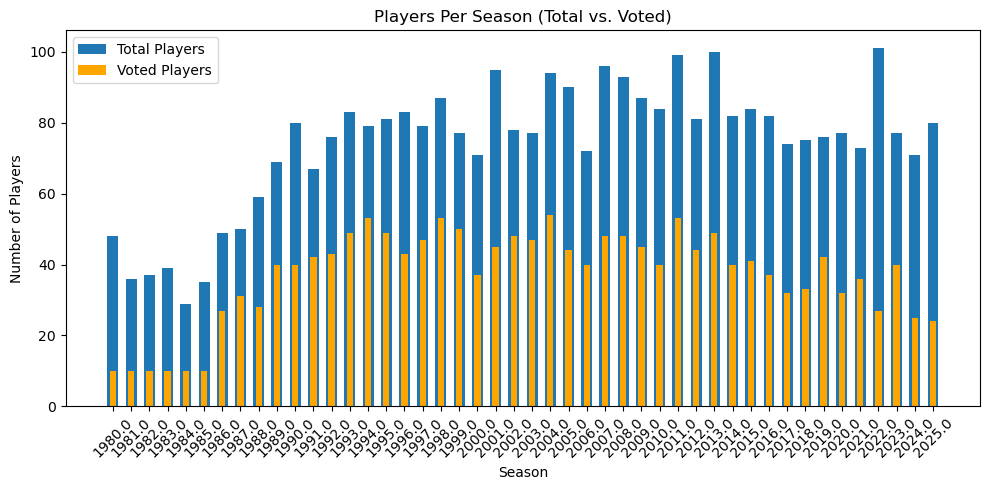

In [ ]:

seasons = mp.get_column('season')
votes = mp.get_column('voted')

unique_seasons = sorted(list(set(seasons)))

# counts
total_counts = [seasons.count(s) for s in unique_seasons]
voted_counts = [
    sum(1 for i in range(len(seasons)) if seasons[i] == s and votes[i] == 1)
    for s in unique_seasons
]

x = np.arange(len(unique_seasons))
bar_width = 0.6   # wide blue bar
front_width = 0.35  # smaller orange bar in front

plt.figure(figsize=(10,5))

# background blue bar (total players)
plt.bar(x, total_counts, width=bar_width, label="Total Players")

# foreground orange bar (voted players)
plt.bar(x, voted_counts, width=front_width, label="Voted Players", color="orange")

plt.xlabel("Season")
plt.ylabel("Number of Players")
plt.title("Players Per Season (Total vs. Voted)")
plt.xticks(x, unique_seasons, rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("plots/balanced/players_per_season_total_vs_voted.png")
plt.show()
